In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

C:\Users\shaba\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("winequality-red.csv",sep=";")

In [3]:
#Descriptive Statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


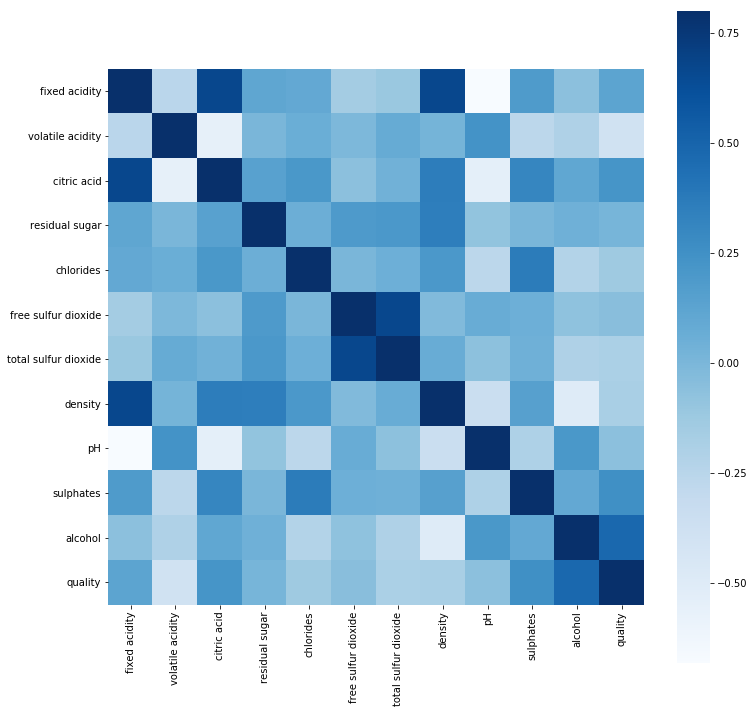

In [4]:
#Heatmap to use during feature engineering
corrmat = data.corr()

f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues")

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#Create Outcome
data["quality_outcome"] = np.where(data.quality >6,0,1)

#Create transformed features
data["acidity_squared"] = data["volatile acidity"] **2
data["acid_squared"] = data["citric acid"] **2
data["chlorides_squared"] = data["chlorides"] **2
data["density_squared"] = data["density"] **2
data["sulphates_squared"] = data["sulphates"] **2
data["alcohol_sulphates"] = data["alcohol"] * data["sulphates"]


In [33]:
#Function to create K Folds, fit model and print output
def k_fold():
    kf = cross_validation.KFold(n=len(data),n_folds=10)
    accuracy=0
    for train_index, test_index in kf:
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        train_x = train_data.drop(["quality_outcome","quality"],axis=1)
        test_x = test_data.drop(["quality_outcome","quality"],axis=1)
        train_y = train_data["quality_outcome"]
        test_y = test_data["quality_outcome"]
        fit = lr.fit(train_x,train_y)
        # Display output       
        print('Coefficients')
        print(fit.coef_)
        print(fit.intercept_)
        pred_y_sklearn = lr.predict(test_x)
        print('\n Accuracy crosstab')
        print(pd.crosstab(pred_y_sklearn, test_y))
        print('\n Percentage accuracy')
        print(lr.score(test_x, test_y))
        accuracy = accuracy + lr.score(test_x,test_y)
    avg_accuracy = accuracy/10
    print("\nAverage Accuracy All Folds: %0.4f" % (avg_accuracy))

In [40]:
#Vanilla Regression
lr = LogisticRegression(C=1e9)
k_fold()

Coefficients
[[  3.74994853e-02   7.69319612e+00   3.23420700e+00  -1.49793806e-01
    9.23254330e+00   2.55066140e-03   9.77680103e-03   2.89005644e+00
    2.43969521e+00  -1.90222962e+01  -8.82266928e-01  -4.26066058e+00
   -4.37051412e+00  -4.90771524e+00   6.69414638e+00   1.04825666e+01
   -1.72538521e-01]]
[-0.93582938]

 Accuracy crosstab
quality_outcome  0    1
row_0                  
0                0    2
1                6  152

 Percentage accuracy
0.95
Coefficients
[[  1.06509417e-01   5.87652055e+00   1.78268139e+00  -1.34087151e-01
    1.23222239e+01  -7.94817696e-03   1.59909262e-02   2.90645535e-01
    3.14169424e+00  -1.04832675e+01  -5.59920985e-01  -3.11785722e+00
   -3.20385814e+00   3.78603189e+00   2.65752624e+00   7.93557206e+00
   -5.50865289e-01]]
[-2.08625728]

 Accuracy crosstab
quality_outcome   0    1
row_0                   
0                 2    1
1                16  141

 Percentage accuracy
0.89375
Coefficients
[[  3.75816962e-02   5.45242394e+00   

In [41]:
#Ridge Regression
lr = LogisticRegression(C=1e9,penalty="l2")
k_fold()

Coefficients
[[  3.74994853e-02   7.69319612e+00   3.23420700e+00  -1.49793806e-01
    9.23254330e+00   2.55066140e-03   9.77680103e-03   2.89005644e+00
    2.43969521e+00  -1.90222962e+01  -8.82266928e-01  -4.26066058e+00
   -4.37051412e+00  -4.90771524e+00   6.69414638e+00   1.04825666e+01
   -1.72538521e-01]]
[-0.93582938]

 Accuracy crosstab
quality_outcome  0    1
row_0                  
0                0    2
1                6  152

 Percentage accuracy
0.95
Coefficients
[[  1.06509417e-01   5.87652055e+00   1.78268139e+00  -1.34087151e-01
    1.23222239e+01  -7.94817696e-03   1.59909262e-02   2.90645535e-01
    3.14169424e+00  -1.04832675e+01  -5.59920985e-01  -3.11785722e+00
   -3.20385814e+00   3.78603189e+00   2.65752624e+00   7.93557206e+00
   -5.50865289e-01]]
[-2.08625728]

 Accuracy crosstab
quality_outcome   0    1
row_0                   
0                 2    1
1                16  141

 Percentage accuracy
0.89375
Coefficients
[[  3.75816962e-02   5.45242394e+00   

In [39]:
#Lasso Regression
lr = LogisticRegression(penalty="l1")
k_fold()

Coefficients
[[  8.07346963e-02   3.11496768e+00   0.00000000e+00  -1.14264971e-01
    4.61379398e-01  -7.39583078e-05   1.10769869e-02   0.00000000e+00
    2.51419778e+00   0.00000000e+00  -3.32376554e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   3.99146592e+00
   -9.58558363e-01]]
[ 0.]

 Accuracy crosstab
quality_outcome  0    1
row_0                  
0                0    2
1                6  152

 Percentage accuracy
0.95
Coefficients
[[ 0.07551605  2.83655712  0.         -0.10729588  1.53542815 -0.0092358
   0.01600818  0.          2.53071067  0.         -0.39154986  0.          0.
   0.          0.          3.350018   -0.8298974 ]]
[ 0.]

 Accuracy crosstab
quality_outcome   0    1
row_0                   
0                 2    1
1                16  141

 Percentage accuracy
0.89375
Coefficients
[[  4.51500430e-02   3.83632588e+00   0.00000000e+00  -9.14746777e-02
    3.88882939e-01  -2.16733957e-03   1.33460522e-02   0.00000000e+00
    2.300426